# Apply power Transformation 

Source: [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [19]:
import pandas as pd
import numpy as np

In [39]:
# from tqdm import notebook as tqdm

# from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 6, 2 # 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.grid'] = True
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

import seaborn as sns
sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])


######### LoadDicts

# import json
# from glob import glob
# from typing import Any
# from typing import NewType

# def np_encoder(object):
#     if isinstance(object, np.generic):
#         return object.item()


# DictsPathType = NewType("DictsPath", str)


# def load_file_json(path: DictsPathType):
#     with open(path, "r") as f:
#         return json.load(f)


# def dump_file_json(path: DictsPathType, var: Any):
#     with open(path, "w") as f:
#         return json.dump(var, f, indent=4, default=np_encoder)


# class LoadDicts:
#     def __init__(
#         self, dict_path: DictsPathType = "./data", ignore_errors: bool = False
#     ):
#         Dicts_glob = Path().glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         self.not_attr = []
#         for path_json in Dicts_glob:
#             try:
#                 name = path_json.as_posix().split("/")[-1].replace(".json", "")
#                 self.List.append(name)
#                 self.Dict[name] = load_file_json(path_json)
#                 if name.isidentifier() and not iskeyword(name):
#                     setattr(self, name, self.Dict[name])
#                 else:
#                     self.not_attr.append(name)
#             except Exception as e:
#                 print(f"Error trying to load the file: {path_json.absolute()}: ")
#                 if not ignore_errors:
#                     raise e
#                 print(e)
                
#     def __len__(self):
#         return len(self.List)
    
#     def items(self):
#         for item in self.List:
#             yield item, self.Dict[item]

#     def __repr__(self) -> str:
#         return "LoadDicts: {}".format(", ".join(self.List))

In [20]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.11.10
IPython version      : 8.27.0

Compiler    : GCC 10.2.1 20210110
OS          : Linux
Release     : 6.8.0-44-generic
Machine     : x86_64
Processor   : 
CPU cores   : 20
Architecture: 64bit

Git hash: 1fa21bde606ae8fa41e261b8bc96908a11a39755

Git repo: https://github.com/ysraell/random-forest-mc-utils.git

Git branch: main

matplotlib: 3.9.2
pandas    : 2.2.2
seaborn   : 0.13.2
numpy     : 1.26.4

CPU	: 12th Gen Intel(R) Core(TM) i7-12700
Mem:            15G
Swap:          3.7G


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

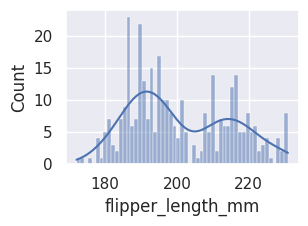

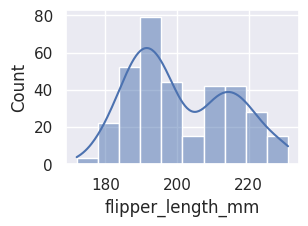

In [34]:
penguins = sns.load_dataset("penguins")
plt.figure()
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, bins=penguins["flipper_length_mm"].nunique())
plt.figure()
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

In [11]:
dataset_path = '/work/tmp/credit-card-fraud-prediction'

In [12]:
!ls $dataset_path

model_eda_16trees_20240914_1212.json   sample_submission.csv
model_eda_256trees_20240914_1337.json  test.csv
model_eda_32trees_20240914_1216.json   train.csv


In [16]:
df_train = pd.read_csv(f'{dataset_path}/train.csv')
df_test = pd.read_csv(f'{dataset_path}/test.csv')

In [17]:
df_train = df_train.drop(columns='Time')
df_test = df_test.drop(columns='Time')

In [22]:
df_train['Transaction_Amount'] = (df_train['Transaction_Amount'] * 100).astype(np.uint32)
df_test['Transaction_Amount'] = (df_test['Transaction_Amount'] * 100).astype(np.uint32)

In [24]:
feat_cols = df_train.columns.to_list()
feat_cols.remove('id')
feat_cols.remove('IsFraud')
feat_cols

['feat1',
 'feat2',
 'feat3',
 'feat4',
 'feat5',
 'feat6',
 'feat7',
 'feat8',
 'feat9',
 'feat10',
 'feat11',
 'feat12',
 'feat13',
 'feat14',
 'feat15',
 'feat16',
 'feat17',
 'feat18',
 'feat19',
 'feat20',
 'feat21',
 'feat22',
 'feat23',
 'feat24',
 'feat25',
 'feat26',
 'feat27',
 'feat28',
 'Transaction_Amount']

/tmp/ipykernel_727/4280775924.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


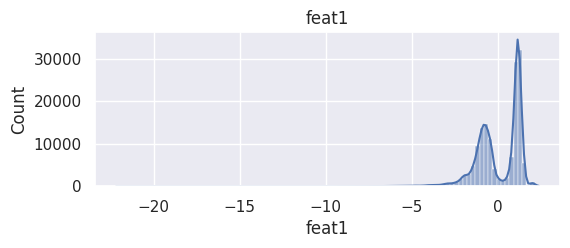

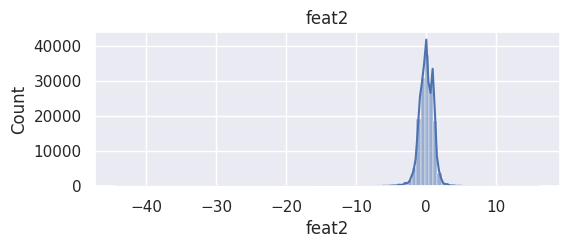

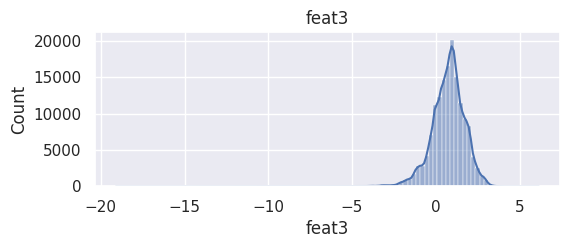

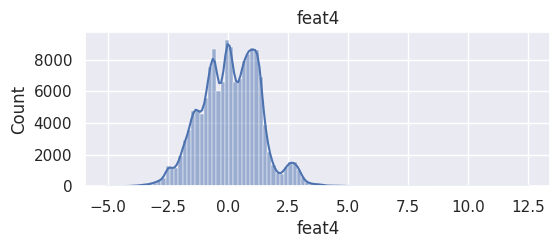

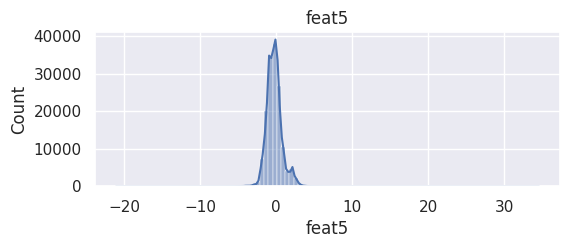

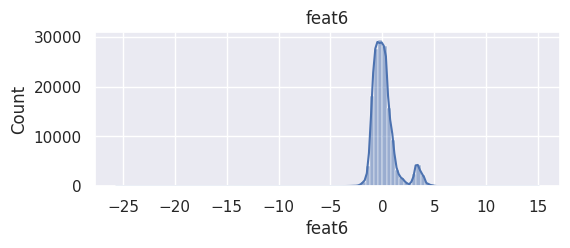

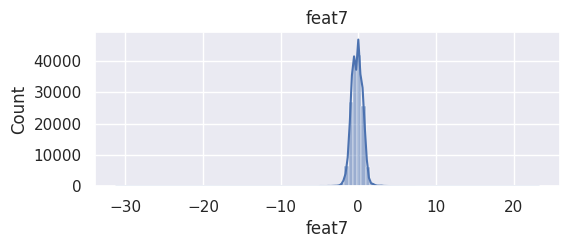

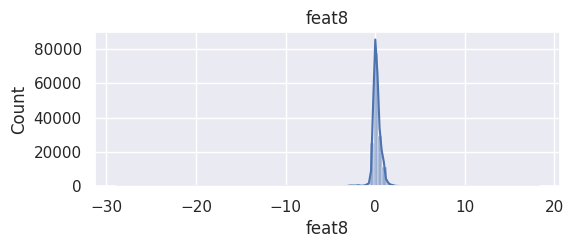

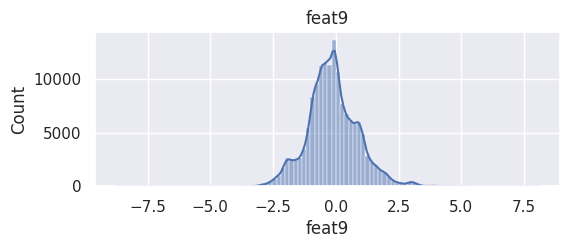

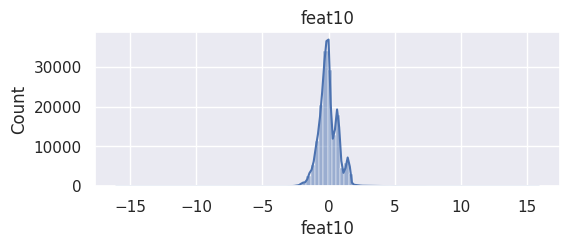

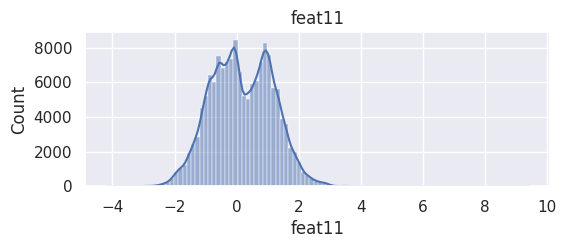

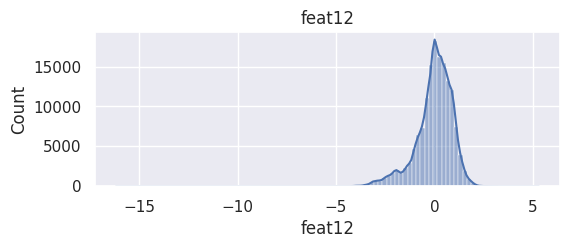

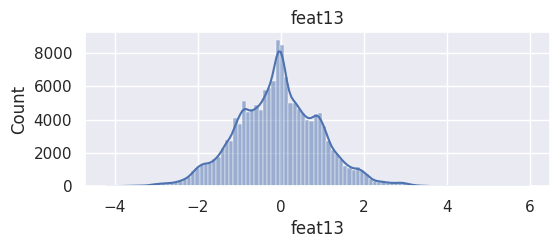

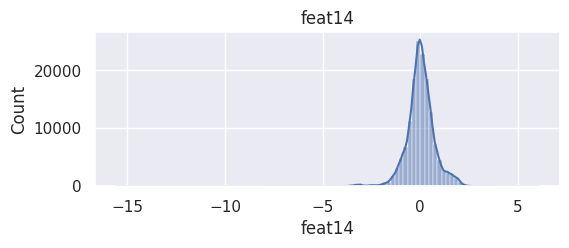

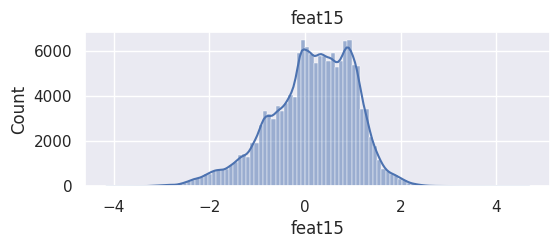

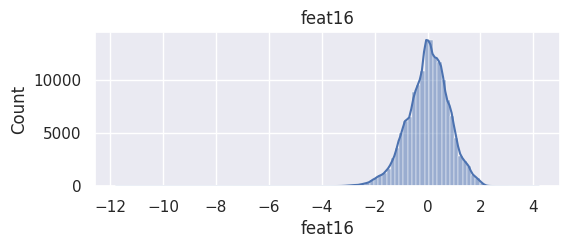

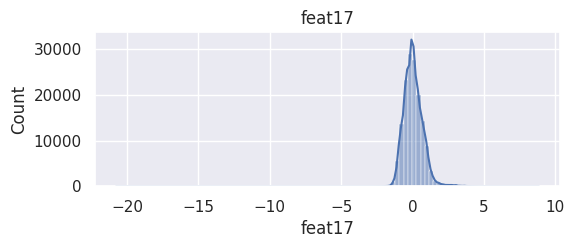

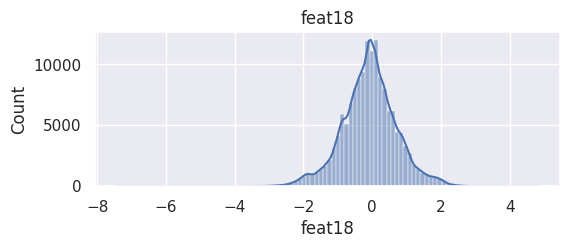

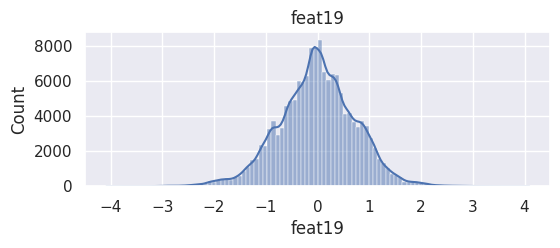

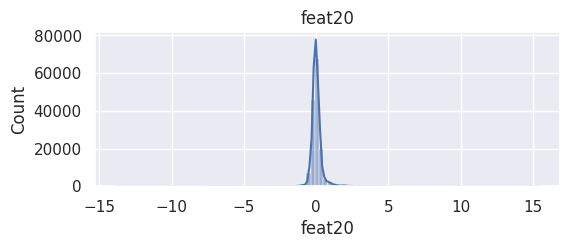

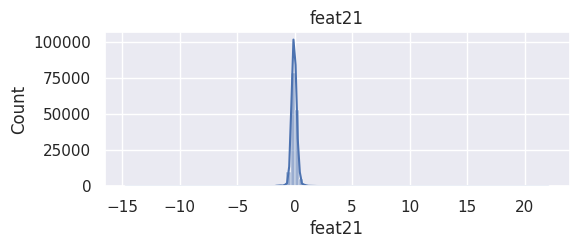

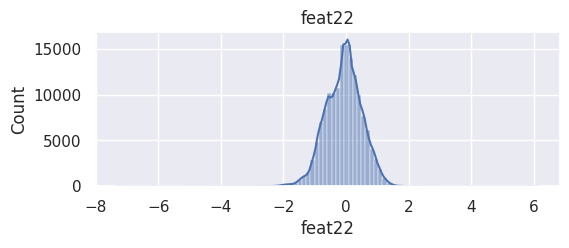

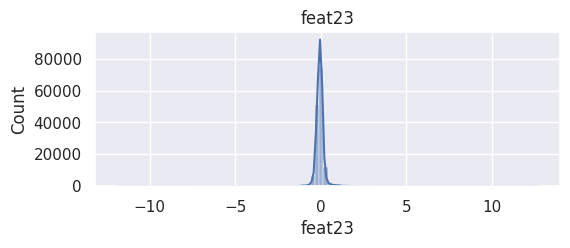

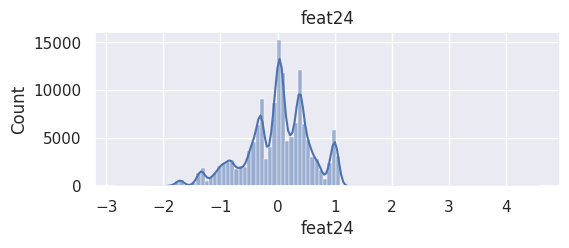

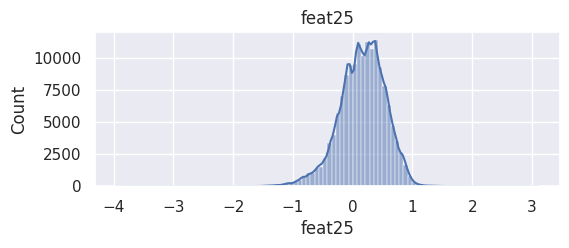

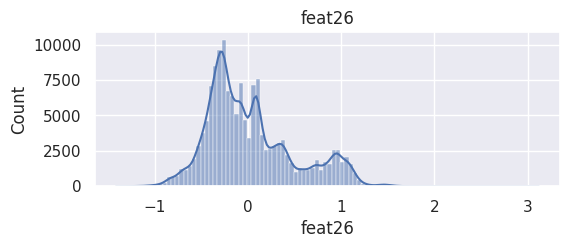

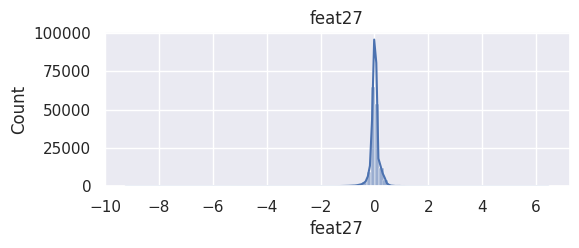

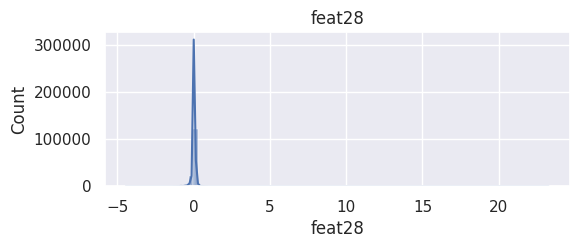

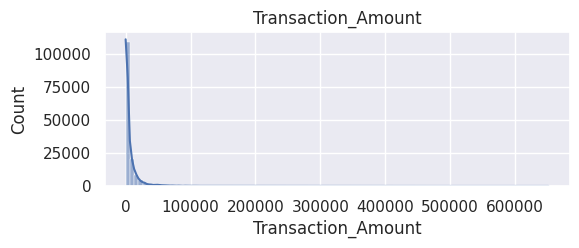

In [52]:
for feat_col in feat_cols:
    plt.figure()
    sns.histplot(data=df_train, x=feat_col, kde=True, bins=min(df_train[feat_col].nunique(), 100))
    plt.title(feat_col)
    plt.autoscale()
    